In [3]:
# Import the module
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)

In [4]:
# # 2023년 추출 코드 필요하면 쓰세요

# # 추정매출
# df_sales = pd.read_csv("../../data/raw data/상권/추정매출/서울시 상권분석서비스(추정매출-상권).csv", encoding="cp949")
# df_sales = df_sales[df_sales['기준_년분기_코드'] >= 20231]
# df_sales.to_csv('../../data/raw data/상권/추정매출/서울시_상권분석서비스(추정매출-상권)_2023년.csv', index=False)

# # 점포
# df_store = pd.read_csv("../../data/raw data/상권/점포/서울시 상권분석서비스(점포-상권).csv", encoding="cp949")
# df_store = df_store[df_store['기준_년분기_코드'] >= 20231]
# df_store.to_csv('../../data/raw data/상권/점포/서울시_상권분석서비스(점포-상권)_2023년.csv', index=False)

## 개별 파일 병합

### 추정매출 sales

In [5]:
sales2019 = pd.read_csv("../../data/raw data/상권/추정매출/서울시_상권분석서비스(추정매출-상권)_2019년.csv", encoding="cp949")
sales2020 = pd.read_csv("../../data/raw data/상권/추정매출/서울시_상권분석서비스(추정매출-상권)_2020년.csv", encoding="cp949")
sales2021 = pd.read_csv("../../data/raw data/상권/추정매출/서울시_상권분석서비스(추정매출-상권)_2021년.csv", encoding="cp949")
sales2022 = pd.read_csv("../../data/raw data/상권/추정매출/서울시_상권분석서비스(추정매출-상권)_2022년.csv", encoding="cp949")
sales2023 = pd.read_csv("../../data/raw data/상권/추정매출/서울시_상권분석서비스(추정매출-상권)_2023년.csv")

In [6]:
sales2019.shape, sales2020.shape, sales2021.shape, sales2022.shape, sales2023.shape

((78405, 55), (79988, 55), (81826, 55), (83573, 55), (42119, 55))

In [7]:
sales = pd.concat([sales2019, sales2020, sales2021, sales2022, sales2023])
sales = sales.reset_index(drop=True)

In [8]:
np.sort(sales['기준_년분기_코드'].unique())

array([20191, 20192, 20193, 20194, 20201, 20202, 20203, 20204, 20211,
       20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232],
      dtype=int64)

### 집객시설 facilities

In [9]:
facilities = pd.read_csv("../../data/raw data/상권/집객시설/서울시 상권분석서비스(집객시설-상권).csv", encoding="cp949")

In [10]:
# 집객시설 - 2019년 1-4분기, 2020년 1-3분기 데이터 없음
np.sort(facilities['기준_년분기_코드'].unique())

array([20204, 20211, 20212, 20213, 20214, 20221, 20222, 20223, 20224,
       20231, 20232], dtype=int64)

In [11]:
facilities.isnull().sum()

기준_년분기_코드         0
상권_구분_코드          0
상권_구분_코드_명        0
상권_코드             0
상권_코드_명           0
집객시설_수            0
관공서_수         10428
은행_수          12001
종합병원_수        17105
일반_병원_수       15906
약국_수           6259
유치원_수         15697
초등학교_수        17215
중학교_수         17314
고등학교_수        17237
대학교_수         16434
백화점_수         17237
슈퍼마켓_수        16203
극장_수          16434
숙박_시설_수       15763
공항_수          17347
철도_역_수        17358
버스_터미널_수      17336
지하철_역_수       15213
버스_정거장_수       3388
dtype: int64

In [12]:
facilities = facilities.fillna(0)
facilities.isnull().sum()

기준_년분기_코드     0
상권_구분_코드      0
상권_구분_코드_명    0
상권_코드         0
상권_코드_명       0
집객시설_수        0
관공서_수         0
은행_수          0
종합병원_수        0
일반_병원_수       0
약국_수          0
유치원_수         0
초등학교_수        0
중학교_수         0
고등학교_수        0
대학교_수         0
백화점_수         0
슈퍼마켓_수        0
극장_수          0
숙박_시설_수       0
공항_수          0
철도_역_수        0
버스_터미널_수      0
지하철_역_수       0
버스_정거장_수      0
dtype: int64

In [13]:
facilities2019 = facilities[(20191 <= facilities['기준_년분기_코드']) & (facilities['기준_년분기_코드'] <= 20194)]
facilities2020 = facilities[(20201 <= facilities['기준_년분기_코드']) & (facilities['기준_년분기_코드'] <= 20204)]
facilities2021 = facilities[(20211 <= facilities['기준_년분기_코드']) & (facilities['기준_년분기_코드'] <= 20214)]
facilities2022 = facilities[(20221 <= facilities['기준_년분기_코드']) & (facilities['기준_년분기_코드'] <= 20224)]
facilities2023 = facilities[(20231 <= facilities['기준_년분기_코드']) & (facilities['기준_년분기_코드'] <= 20234)]

In [14]:
# 2020년 1, 2, 3분기 데이터 생성(= 2020년 4분기 copy)
facilities20204 = facilities2020[facilities2020['기준_년분기_코드'] == 20204]

facilities20201 = facilities20204.copy()
facilities20202 = facilities20204.copy()
facilities20203 = facilities20204.copy()

facilities20201['기준_년분기_코드'] = 20201
facilities20202['기준_년분기_코드'] = 20202
facilities20203['기준_년분기_코드'] = 20203

print(facilities20201.shape, facilities20202.shape, facilities20203.shape, facilities20204.shape)

facilities2020 = pd.concat([facilities20201, facilities20202, facilities20203, facilities20204])
facilities2020 = facilities2020.reset_index(drop=True)

print(facilities2020['기준_년분기_코드'].unique())

(1578, 25) (1578, 25) (1578, 25) (1578, 25)
[20201 20202 20203 20204]


In [15]:
facilities2019.shape, facilities2020.shape, facilities2021.shape, facilities2022.shape, facilities2023.shape

((0, 25), (6312, 25), (6312, 25), (6312, 25), (3156, 25))

In [16]:
facilities = pd.concat([facilities2019, facilities2020, facilities2021, facilities2022, facilities2023])
facilities = facilities.reset_index(drop=True)

In [17]:
np.sort(facilities['기준_년분기_코드'].unique())

array([20201, 20202, 20203, 20204, 20211, 20212, 20213, 20214, 20221,
       20222, 20223, 20224, 20231, 20232], dtype=int64)

### 직장인구 office_population

In [18]:
# 직장인구 데이터 load
office_population = pd.read_csv("../../data/raw data/상권/직장인구/서울시 상권분석서비스(직장인구-상권).csv", encoding="cp949")

In [19]:
# 직장인구 - 2019년 2-3분기 데이터 없음
np.sort(office_population['기준_년분기_코드'].unique())

array([20191, 20194, 20201, 20202, 20203, 20204, 20211, 20212, 20213,
       20214, 20221, 20222, 20223, 20224, 20231, 20232], dtype=int64)

In [20]:
office_population.isnull().sum()

기준_년분기_코드              0
상권_구분_코드               0
상권_구분_코드_명             0
상권_코드                  0
상권_코드_명                0
총_직장_인구_수              0
남성_직장_인구_수             0
여성_직장_인구_수             0
연령대_10_직장_인구_수         0
연령대_20_직장_인구_수         0
연령대_30_직장_인구_수         0
연령대_40_직장_인구_수         0
연령대_50_직장_인구_수         0
연령대_60_이상_직장_인구_수      0
남성연령대_10_직장_인구_수       0
남성연령대_20_직장_인구_수       0
남성연령대_30_직장_인구_수       0
남성연령대_40_직장_인구_수       0
남성연령대_50_직장_인구_수       0
남성연령대_60_이상_직장_인구_수    0
여성연령대_10_직장_인구_수       0
여성연령대_20_직장_인구_수       0
여성연령대_30_직장_인구_수       0
여성연령대_40_직장_인구_수       0
여성연령대_50_직장_인구_수       0
여성연령대_60_이상_직장_인구_수    0
dtype: int64

In [21]:
office_population2019 = office_population[(20191 <= office_population['기준_년분기_코드']) & (office_population['기준_년분기_코드'] <= 20194)]
office_population2020 = office_population[(20201 <= office_population['기준_년분기_코드']) & (office_population['기준_년분기_코드'] <= 20204)]
office_population2021 = office_population[(20211 <= office_population['기준_년분기_코드']) & (office_population['기준_년분기_코드'] <= 20214)]
office_population2022 = office_population[(20221 <= office_population['기준_년분기_코드']) & (office_population['기준_년분기_코드'] <= 20224)]
office_population2023 = office_population[(20231 <= office_population['기준_년분기_코드']) & (office_population['기준_년분기_코드'] <= 20234)]

In [22]:
office_population2019.shape, office_population2020.shape, office_population2021.shape, office_population2022.shape, office_population2023.shape

((3267, 26), (6492, 26), (6492, 26), (6492, 26), (3246, 26))

In [23]:
# 2019년 2,3분기 데이터 생성(= 2019년 1분기 copy)
office_population20191 = office_population2019[office_population2019['기준_년분기_코드']==20191]
office_population20192 = office_population20191.copy()
office_population20193 = office_population20191.copy()
office_population20194 = office_population2019[office_population2019['기준_년분기_코드']==20194]

office_population20192['기준_년분기_코드'] = 20192
office_population20193['기준_년분기_코드'] = 20193

print(office_population20191.shape, office_population20192.shape, office_population20193.shape, office_population20194.shape)

office_population2019 = pd.concat([office_population20191, office_population20192, office_population20193, office_population20194])
office_population2019 = office_population2019.reset_index(drop=True)

print(office_population2019['기준_년분기_코드'].unique())

(1644, 26) (1644, 26) (1644, 26) (1623, 26)
[20191 20192 20193 20194]


In [24]:
office_population = pd.concat([office_population2019, office_population2020, office_population2021, office_population2022, office_population2023])
office_population = office_population.reset_index(drop=True)

In [25]:
np.sort(office_population['기준_년분기_코드'].unique())

array([20191, 20192, 20193, 20194, 20201, 20202, 20203, 20204, 20211,
       20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232],
      dtype=int64)

### 점포 store

In [26]:
store2019 = pd.read_csv("../../data/raw data/상권/점포/서울시_상권분석서비스(점포-상권)_2019년.csv", encoding="cp949")
store2020 = pd.read_csv("../../data/raw data/상권/점포/서울시_상권분석서비스(점포-상권)_2020년.csv", encoding="cp949")
store2021 = pd.read_csv("../../data/raw data/상권/점포/서울시_상권분석서비스(점포-상권)_2021년.csv", encoding="cp949")
store2022 = pd.read_csv("../../data/raw data/상권/점포/서울시_상권분석서비스(점포-상권)_2022년.csv", encoding="cp949")
store2023 = pd.read_csv("../../data/raw data/상권/점포/서울시_상권분석서비스(점포-상권)_2023년.csv")

In [27]:
store2019.shape, store2020.shape, store2021.shape, store2022.shape, store2023.shape

((298601, 14), (301143, 14), (303483, 14), (304755, 14), (152288, 14))

In [28]:
store = pd.concat([store2019, store2020, store2021, store2022, store2023])
store = store.reset_index(drop=True)

In [29]:
np.sort(store['기준_년분기_코드'].unique())

array([20191, 20192, 20193, 20194, 20201, 20202, 20203, 20204, 20211,
       20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232],
      dtype=int64)

In [30]:
store.isnull().sum()

기준_년분기_코드      0
상권_구분_코드       0
상권_구분_코드_명     0
상권_코드          0
상권_코드_명        0
서비스_업종_코드      0
서비스_업종_코드_명    0
점포_수           0
유사_업종_점포_수     0
개업_율           0
개업_점포_수        0
폐업_률           0
폐업_점포_수        0
프랜차이즈_점포_수     0
dtype: int64

### 영역 area

In [31]:
area = pd.read_csv("../../data/raw data/상권/영역/서울시 상권분석서비스(영역-상권).csv", encoding="cp949")
area

,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적
0,A,골목상권,3110008,배화여자대학교(박노수미술관),197093,453418,11110,종로구,11110515,청운효자동,149264
1,A,골목상권,3110009,자하문터널,196991,455057,11110,종로구,11110550,부암동,178306
2,A,골목상권,3110010,평창동서측,197064,456643,11110,종로구,11110560,평창동,369415
3,A,골목상권,3110017,정독도서관,198581,453781,11110,종로구,11110600,가회동,83855
4,A,골목상권,3110018,중앙고등학교,198883,453690,11110,종로구,11110600,가회동,166872
...,...,...,...,...,...,...,...,...,...,...,...
1645,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,198397,451614,11140,중구,11140520,소공동,983618
1646,U,관광특구,3001493,동대문패션타운 관광특구,200996,451976,11140,중구,11140590,광희동,606058
1647,U,관광특구,3001494,종로?청계 관광특구,199796,452274,11110,종로구,11110615,종로1?2?3?4가동,653127
1648,U,관광특구,3001495,잠실 관광특구,210188,446334,11710,송파구,11710562,방이2동,2462734


In [32]:
area.isnull().sum()

상권_구분_코드      0
상권_구분_코드_명    0
상권_코드         0
상권_코드_명       0
엑스좌표_값        0
와이좌표_값        0
자치구_코드        0
자치구_코드_명      0
행정동_코드        0
행정동_코드_명      0
영역_면적         0
dtype: int64

### 아파트 apartment

In [33]:
apartment = pd.read_csv("../../data/raw data/상권/아파트/서울시 상권분석서비스(아파트-상권).csv", encoding="cp949")

In [34]:
# 아파트 - 2019년 1-3분기 데이터 없음
np.sort(apartment['기준_년분기_코드'].unique())

array([20194, 20201, 20202, 20203, 20204, 20211, 20212, 20213, 20214,
       20221, 20222, 20223, 20224, 20231, 20232], dtype=int64)

In [35]:
apartment.isnull().sum()

기준_년분기_코드                     0
상권_구분_코드                      0
상권_구분_코드_명                    0
상권_코드                         0
상권_코드_명                       0
아파트_단지_수                      0
아파트_면적_66_제곱미터_미만_세대_수      538
아파트_면적_66_제곱미터_세대_수        1742
아파트_면적_99_제곱미터_세대_수        8074
아파트_면적_132_제곱미터_세대_수      14566
아파트_면적_165_제곱미터_세대_수      17465
아파트_가격_1_억_미만_세대_수         4190
아파트_가격_1_억_세대_수            1470
아파트_가격_2_억_세대_수            2317
아파트_가격_3_억_세대_수            8088
아파트_가격_4_억_세대_수           13056
아파트_가격_5_억_세대_수           15868
아파트_가격_6_억_이상_세대_수        16613
아파트_평균_면적                     0
아파트_평균_시가                     0
dtype: int64

In [36]:
# 결측치 0으로 대체
apartment = apartment.fillna(0) 
apartment.isnull().sum()

기준_년분기_코드                 0
상권_구분_코드                  0
상권_구분_코드_명                0
상권_코드                     0
상권_코드_명                   0
아파트_단지_수                  0
아파트_면적_66_제곱미터_미만_세대_수    0
아파트_면적_66_제곱미터_세대_수       0
아파트_면적_99_제곱미터_세대_수       0
아파트_면적_132_제곱미터_세대_수      0
아파트_면적_165_제곱미터_세대_수      0
아파트_가격_1_억_미만_세대_수        0
아파트_가격_1_억_세대_수           0
아파트_가격_2_억_세대_수           0
아파트_가격_3_억_세대_수           0
아파트_가격_4_억_세대_수           0
아파트_가격_5_억_세대_수           0
아파트_가격_6_억_이상_세대_수        0
아파트_평균_면적                 0
아파트_평균_시가                 0
dtype: int64

In [37]:
apartment2019 = apartment[(20191 <= apartment['기준_년분기_코드']) & (apartment['기준_년분기_코드'] <= 20194)]
apartment2020 = apartment[(20201 <= apartment['기준_년분기_코드']) & (apartment['기준_년분기_코드'] <= 20204)]
apartment2021 = apartment[(20211 <= apartment['기준_년분기_코드']) & (apartment['기준_년분기_코드'] <= 20214)]
apartment2022 = apartment[(20221 <= apartment['기준_년분기_코드']) & (apartment['기준_년분기_코드'] <= 20224)]
apartment2023 = apartment[(20231 <= apartment['기준_년분기_코드']) & (apartment['기준_년분기_코드'] <= 20234)]

In [38]:
apartment2019.shape, apartment2020.shape, apartment2021.shape, apartment2022.shape, apartment2023.shape

((1484, 20), (5936, 20), (5916, 20), (5855, 20), (2926, 20))

In [39]:
apartment = pd.concat([apartment2019, apartment2020, apartment2021, apartment2022, apartment2023])
apartment = apartment.reset_index(drop=True)

### 소득소비 money

In [40]:
money = pd.read_csv("../../data/raw data/상권/소득소비/서울시 상권분석서비스(소득소비-상권).csv", encoding="cp949")

In [41]:
np.sort(money['기준_년분기_코드'].unique())

array([20191, 20192, 20193, 20194, 20201, 20202, 20203, 20204, 20211,
       20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232],
      dtype=int64)

In [42]:
money.isnull().sum()

기준_년분기_코드         0
상권_구분_코드          0
상권_구분_코드_명        0
상권_코드             0
상권_코드_명           0
월_평균_소득_금액      156
소득_구간_코드        156
지출_총금액          624
식료품_지출_총금액      624
의류_신발_지출_총금액    624
생활용품_지출_총금액     624
의료비_지출_총금액      624
교통_지출_총금액       624
여가_지출_총금액       624
문화_지출_총금액       624
교육_지출_총금액       624
유흥_지출_총금액       624
dtype: int64

In [43]:
# 결측치 0으로 대체
money = money.fillna(0)
money.isnull().sum()

기준_년분기_코드       0
상권_구분_코드        0
상권_구분_코드_명      0
상권_코드           0
상권_코드_명         0
월_평균_소득_금액      0
소득_구간_코드        0
지출_총금액          0
식료품_지출_총금액      0
의류_신발_지출_총금액    0
생활용품_지출_총금액     0
의료비_지출_총금액      0
교통_지출_총금액       0
여가_지출_총금액       0
문화_지출_총금액       0
교육_지출_총금액       0
유흥_지출_총금액       0
dtype: int64

In [44]:
money2019 = money[(20191 <= money['기준_년분기_코드']) & (money['기준_년분기_코드'] <= 20194)]
money2020 = money[(20201 <= money['기준_년분기_코드']) & (money['기준_년분기_코드'] <= 20204)]
money2021 = money[(20211 <= money['기준_년분기_코드']) & (money['기준_년분기_코드'] <= 20214)]
money2022 = money[(20221 <= money['기준_년분기_코드']) & (money['기준_년분기_코드'] <= 20224)]
money2023 = money[(20231 <= money['기준_년분기_코드']) & (money['기준_년분기_코드'] <= 20234)]

In [45]:
money2019.shape, money2020.shape, money2021.shape, money2022.shape, money2023.shape

((6518, 17), (6524, 17), (6524, 17), (6524, 17), (3262, 17))

In [46]:
money = pd.concat([money2019, money2020, money2021, money2022, money2023])
money = money.reset_index(drop=True)

### 생활인구 de_facto_population

In [47]:
de_facto_population = pd.read_csv("../../data/raw data/상권/생활인구/서울시 상권분석서비스(길단위인구-상권).csv", encoding="cp949")

In [48]:
np.sort(de_facto_population['기준_년분기_코드'].unique())

array([20191, 20192, 20193, 20194, 20201, 20202, 20203, 20204, 20211,
       20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232],
      dtype=int64)

In [49]:
de_facto_population.isnull().sum()

기준_년분기_코드           0
상권_구분_코드            0
상권_구분_코드_명          0
상권_코드               0
상권_코드_명             0
총_유동인구_수            0
남성_유동인구_수           0
여성_유동인구_수           0
연령대_10_유동인구_수       0
연령대_20_유동인구_수       0
연령대_30_유동인구_수       0
연령대_40_유동인구_수       0
연령대_50_유동인구_수       0
연령대_60_이상_유동인구_수    0
시간대_00_06_유동인구_수    0
시간대_06_11_유동인구_수    0
시간대_11_14_유동인구_수    0
시간대_14_17_유동인구_수    0
시간대_17_21_유동인구_수    0
시간대_21_24_유동인구_수    0
월요일_유동인구_수          0
화요일_유동인구_수          0
수요일_유동인구_수          0
목요일_유동인구_수          0
금요일_유동인구_수          0
토요일_유동인구_수          0
일요일_유동인구_수          0
dtype: int64

In [50]:
de_facto_population2019 = de_facto_population[(20191 <= de_facto_population['기준_년분기_코드']) & (de_facto_population['기준_년분기_코드'] <= 20194)]
de_facto_population2020 = de_facto_population[(20201 <= de_facto_population['기준_년분기_코드']) & (de_facto_population['기준_년분기_코드'] <= 20204)]
de_facto_population2021 = de_facto_population[(20211 <= de_facto_population['기준_년분기_코드']) & (de_facto_population['기준_년분기_코드'] <= 20214)]
de_facto_population2022 = de_facto_population[(20221 <= de_facto_population['기준_년분기_코드']) & (de_facto_population['기준_년분기_코드'] <= 20224)]
de_facto_population2023 = de_facto_population[(20231 <= de_facto_population['기준_년분기_코드']) & (de_facto_population['기준_년분기_코드'] <= 20234)]

In [51]:
de_facto_population2019.shape, de_facto_population2020.shape, de_facto_population2021.shape, de_facto_population2022.shape, de_facto_population2023.shape

((6600, 27), (6600, 27), (6600, 27), (6599, 27), (3298, 27))

In [52]:
de_facto_population = pd.concat([de_facto_population2019, de_facto_population2020, de_facto_population2021, de_facto_population2022, de_facto_population2023])
de_facto_population = de_facto_population.reset_index(drop=True)

### 상주인구 de_jure_population

In [53]:
de_jure_population = pd.read_csv("../../data/raw data/상권/상주인구/서울시 상권분석서비스(상주인구-상권).csv", encoding="cp949")

In [54]:
# 상주인구 - 2019년 1-3분기 데이터 없음
np.sort(de_jure_population['기준_년분기_코드'].unique())

array([20194, 20201, 20202, 20203, 20204, 20211, 20212, 20213, 20214,
       20221, 20222, 20223, 20224, 20231, 20232], dtype=int64)

In [55]:
de_jure_population.isnull().sum()

기준_년분기_코드             0
상권_구분_코드              0
상권_구분_코드_명            0
상권_코드                 0
상권_코드_명               0
총_상주인구_수              0
남성_상주인구_수             0
여성_상주인구_수             0
연령대_10_상주인구_수         0
연령대_20_상주인구_수         0
연령대_30_상주인구_수         0
연령대_40_상주인구_수         0
연령대_50_상주인구_수         0
연령대_60_이상_상주인구_수      0
남성연령대_10_상주인구_수       0
남성연령대_20_상주인구_수       0
남성연령대_30_상주인구_수       0
남성연령대_40_상주인구_수       0
남성연령대_50_상주인구_수       0
남성연령대_60_이상_상주인구_수    0
여성연령대_10_상주인구_수       0
여성연령대_20_상주인구_수       0
여성연령대_30_상주인구_수       0
여성연령대_40_상주인구_수       0
여성연령대_50_상주인구_수       0
여성연령대_60_이상_상주인구_수    0
총_가구_수                0
아파트_가구_수              0
비_아파트_가구_수            0
dtype: int64

In [56]:
de_jure_population2019 = de_jure_population[(20191 <= de_jure_population['기준_년분기_코드']) & (de_jure_population['기준_년분기_코드'] <= 20194)]
de_jure_population2020 = de_jure_population[(20201 <= de_jure_population['기준_년분기_코드']) & (de_jure_population['기준_년분기_코드'] <= 20204)]
de_jure_population2021 = de_jure_population[(20211 <= de_jure_population['기준_년분기_코드']) & (de_jure_population['기준_년분기_코드'] <= 20214)]
de_jure_population2022 = de_jure_population[(20221 <= de_jure_population['기준_년분기_코드']) & (de_jure_population['기준_년분기_코드'] <= 20224)]
de_jure_population2023 = de_jure_population[(20231 <= de_jure_population['기준_년분기_코드']) & (de_jure_population['기준_년분기_코드'] <= 20234)]

In [57]:
de_jure_population2019.shape, de_jure_population2020.shape, de_jure_population2021.shape, de_jure_population2022.shape, de_jure_population2023.shape

((1634, 29), (6536, 29), (6536, 29), (6527, 29), (3253, 29))

In [58]:
de_jure_population = pd.concat([de_jure_population2019, de_jure_population2020, de_jure_population2021, de_jure_population2022, de_jure_population2023])
de_jure_population = de_jure_population.reset_index(drop=True)

## 전체 병합 전 전처리

#### 추정매출 데이터와 상권_코드 비교

In [59]:
# 추정매출 sales, 집객시설 facilites

In [60]:
sales_code = set(sales['상권_코드'])
facilities_code = set(facilities['상권_코드'])
print("추정매출 상권_코드 수:", len(sales_code))
print("집객시설 상권_코드 수:", len(facilities_code))

추정매출 상권_코드 수: 1577
집객시설 상권_코드 수: 1578


In [61]:
only_sales_not_facilities = sales_code-facilities_code
print("추정매출에만 있는 상권 코드 수:", len(only_sales_not_facilities))
for code in only_sales_not_facilities:
    print(code, sales.loc[sales['상권_코드'] == code, '상권_코드_명'].drop_duplicates().values, sales.loc[sales['상권_코드'] == code, '상권_구분_코드_명'].drop_duplicates().values)

추정매출에만 있는 상권 코드 수: 58
3110145 ['장안초등학교'] ['골목상권']
3110914 ['내방역 6번'] ['골목상권']
3130247 ['우리시장'] ['전통시장']
3111048 ['천호역 1번(천호문구완구거리)'] ['골목상권']
3130249 ['동남상가'] ['전통시장']
3130250 ['삼구시장(로타리상가)'] ['전통시장']
3110923 ['방배역 1번'] ['골목상권']
3111050 ['강동구청(강동구청역 2번)'] ['골목상권']
3110669 ['화곡보람2차아파트'] ['골목상권']
3130254 ['남서울상가'] ['전통시장']
3110928 ['서초우방유쉘아파트'] ['골목상권']
3110808 ['신길역 1번'] ['골목상권']
3110937 ['방아다리근린공원(횃불트리니티신학대학원대학교)'] ['골목상권']
3110938 ['바우뫼공원'] ['골목상권']
3110044 ['관성묘'] ['골목상권']
3130013 ['동대문상가A동'] ['전통시장']
3130142 ['강북북부시장'] ['전통시장']
3130269 ['강남시장(동작구 강남시장)'] ['전통시장']
3130270 ['흑석시장'] ['전통시장']
3110046 ['버티고개'] ['골목상권']
3110685 ['금강수목원아파트'] ['골목상권']
3130275 ['강남골목시장'] ['전통시장']
3110941 ['언남고등학교'] ['골목상권']
3110946 ['청계산원터골'] ['골목상권']
3110704 ['고척중학교'] ['골목상권']
3130033 ['대림상가(청계상가)'] ['전통시장']
3130291 ['봉천제일종합시장'] ['전통시장']
3130292 ['봉천현대시장'] ['전통시장']
3110581 ['염리초등학교'] ['골목상권']
3110963 ['역삼월드메르디앙아파트'] ['골목상권']
3110965 ['언주역 6번'] ['골목상권']
3130173 ['백련시장'] ['전통시장']
3130046 ['team204(팀204)'] ['전

In [62]:
# 추정매출 sales, 직장인구 office_population

In [63]:
sales_code = set(sales['상권_코드'])
office_population_code = set(office_population['상권_코드'])
print("추정매출 상권_코드 수:", len(sales_code))
print("직장인구 상권_코드 수:", len(office_population_code))

추정매출 상권_코드 수: 1577
직장인구 상권_코드 수: 1646


In [64]:
only_sales_not_office = sales_code-office_population_code
print("추정매출에만 있는 상권 코드 수:", len(only_sales_not_office))
for code in only_sales_not_office:
    print(code, sales.loc[sales['상권_코드'] == code, '상권_코드_명'].drop_duplicates().values, sales.loc[sales['상권_코드'] == code, '상권_구분_코드_명'].drop_duplicates().values)

추정매출에만 있는 상권 코드 수: 0


In [65]:
# 추정매출 sales, 점포 store

In [66]:
sales_code = set(sales['상권_코드'])
store_code = set(store['상권_코드'])
print("추정매출 상권_코드 수:", len(sales_code))
print("점포 상권_코드 수:", len(store_code))

추정매출 상권_코드 수: 1577
점포 상권_코드 수: 1648


In [67]:
only_sales_not_store = sales_code-store_code
print("추정매출에만 있는 상권 코드 수:", len(only_sales_not_store))
for code in only_sales_not_store:
    print(code, sales.loc[sales['상권_코드'] == code, '상권_코드_명'].drop_duplicates().values, sales.loc[sales['상권_코드'] == code, '상권_구분_코드_명'].drop_duplicates().values)

추정매출에만 있는 상권 코드 수: 0


In [68]:
# 추정매출 sales, 영역 area

In [69]:
sales_code = set(sales['상권_코드'])
area_code = set(area['상권_코드'])
print("추정매출 상권_코드 수:", len(sales_code))
print("영역 상권_코드 수:", len(area_code))

추정매출 상권_코드 수: 1577
영역 상권_코드 수: 1650


In [70]:
only_sales_not_area = sales_code-area_code
print("추정매출에만 있는 상권 코드 수:", len(only_sales_not_area))
for code in only_sales_not_area:
    print(code, sales.loc[sales['상권_코드'] == code, '상권_코드_명'].drop_duplicates().values, sales.loc[sales['상권_코드'] == code, '상권_구분_코드_명'].drop_duplicates().values)

추정매출에만 있는 상권 코드 수: 0


In [71]:
# 추정매출 sales, 아파트 apartment

In [72]:
sales_code = set(sales['상권_코드'])
apartment_code = set(apartment['상권_코드'])
print("추정매출 상권_코드 수:", len(sales_code))
print("아파트 상권_코드 수:", len(apartment_code))

추정매출 상권_코드 수: 1577
아파트 상권_코드 수: 1493


In [73]:
only_sales_not_apartment = sales_code-apartment_code
print("추정매출에만 있는 상권 코드 수:", len(only_sales_not_apartment))
for code in only_sales_not_apartment:
    print(code, sales.loc[sales['상권_코드'] == code, '상권_코드_명'].drop_duplicates().values, sales.loc[sales['상권_코드'] == code, '상권_구분_코드_명'].drop_duplicates().values)

추정매출에만 있는 상권 코드 수: 143
3120137 ['문래역(문래로데오거리)'] ['발달상권']
3120140 ['문래동주민센터'] ['발달상권']
3120148 ['국회의사당역(국회의사당)'] ['발달상권']
3110430 ['중계초등학교'] ['골목상권']
3110948 ['헌인가구단지'] ['골목상권']
3110962 ['도산공원북측'] ['골목상권']
3110978 ['도곡2동주민센터(대치중학교)'] ['골목상권']
3110998 ['은곡마을(은곡마을공원)'] ['골목상권']
3111000 ['대왕초등학교(세곡동사거리서남측)'] ['골목상권']
3111002 ['한국교통안전공단 강남자동차검사소'] ['골목상권']
3120218 ['코엑스'] ['발달상권']
3110492 ['하나고등학교'] ['골목상권']
3120224 ['수서역'] ['발달상권']
3110497 ['가좌역 3번'] ['골목상권']
3120231 ['가락시장'] ['발달상권']
3110530 ['아현역 1번'] ['골목상권']
3110019 ['창덕궁'] ['골목상권']
3110026 ['종로5가역 4번'] ['골목상권']
3110032 ['수족관거리'] ['골목상권']
3110034 ['창신1동주민센터'] ['골목상권']
3001492 ['명동 남대문 북창동 다동 무교동 관광특구'] ['관광특구']
3130005 ['세운상가가동'] ['전통시장']
3110038 ['경향신문사'] ['골목상권']
3130007 ['광장시장(광장전통시장)'] ['전통시장']
3001496 ['강남 마이스 관광특구'] ['관광특구']
3130009 ['마전교지하쇼핑센터(구 한일상가)'] ['전통시장']
3130010 ['종로신진시장'] ['전통시장']
3130011 ['충신시장'] ['전통시장']
3130012 ['동대문종합시장(동대문종합시장 신관, 동대문종합시장D동상가)'] ['전통시장']
3130015 ['창신골목시장'] ['전통시장']
3130018 ['동대문문구완구거리(동대문문구완구시장)'] 

In [74]:
# 추정매출 sales, 소득소비 money

In [75]:
sales_code = set(sales['상권_코드'])
money_code = set(money['상권_코드'])
print("추정매출 상권_코드 수:", len(sales_code))
print("소득소비 상권_코드 수:", len(money_code))

추정매출 상권_코드 수: 1577
소득소비 상권_코드 수: 1633


In [76]:
only_sales_not_money = sales_code-money_code
print("추정매출에만 있는 상권 코드 수:", len(only_sales_not_money))
for code in only_sales_not_money:
    print(code, sales.loc[sales['상권_코드'] == code, '상권_코드_명'].drop_duplicates().values, sales.loc[sales['상권_코드'] == code, '상권_구분_코드_명'].drop_duplicates().values)

추정매출에만 있는 상권 코드 수: 12
3130304 ['신사상가'] ['전통시장']
3120099 ['월드컵경기장역(월드컵경기장)'] ['발달상권']
3130022 ['숭례문수입상가(남대문시장)'] ['전통시장']
3120231 ['가락시장'] ['발달상권']
3130184 ['마포농수산물시장'] ['전통시장']
3110793 ['대림썬프라자'] ['골목상권']
3130142 ['강북북부시장'] ['전통시장']
3130096 ['동부시장'] ['전통시장']
3120115 ['김포공항역(김포공항)'] ['발달상권']
3130009 ['마전교지하쇼핑센터(구 한일상가)'] ['전통시장']
3111002 ['한국교통안전공단 강남자동차검사소'] ['골목상권']
3130174 ['연희사러가'] ['전통시장']


In [77]:
# 추정매출 sales, 생활인구 de_facto_population

In [78]:
sales_code = set(sales['상권_코드'])
de_facto_population_code = set(de_facto_population['상권_코드'])
print("추정매출 상권_코드 수:", len(sales_code))
print("생활인구 상권_코드 수:", len(de_facto_population_code))

추정매출 상권_코드 수: 1577
생활인구 상권_코드 수: 1650


In [79]:
only_sales_not_facto = sales_code-de_facto_population_code
print("추정매출에만 있는 상권 코드 수:", len(only_sales_not_facto))
for code in only_sales_not_facto:
    print(code, sales.loc[sales['상권_코드'] == code, '상권_코드_명'].drop_duplicates().values, sales.loc[sales['상권_코드'] == code, '상권_구분_코드_명'].drop_duplicates().values)

추정매출에만 있는 상권 코드 수: 0


In [80]:
# 추정매출 sales, 상주인구 de_jure_population

In [81]:
sales_code = set(sales['상권_코드'])
de_jure_population_code = set(de_jure_population['상권_코드'])
print("추정매출 상권_코드 수:", len(sales_code))
print("상주인구 상권_코드 수:", len(de_jure_population_code))

추정매출 상권_코드 수: 1577
상주인구 상권_코드 수: 1638


In [82]:
only_sales_not_jure = sales_code-de_jure_population_code
print("추정매출에만 있는 상권 코드 수:", len(only_sales_not_jure))
for code in only_sales_not_jure:
    print(code, sales.loc[sales['상권_코드'] == code, '상권_코드_명'].drop_duplicates().values, sales.loc[sales['상권_코드'] == code, '상권_구분_코드_명'].drop_duplicates().values)

추정매출에만 있는 상권 코드 수: 10
3120099 ['월드컵경기장역(월드컵경기장)'] ['발달상권']
3130022 ['숭례문수입상가(남대문시장)'] ['전통시장']
3120231 ['가락시장'] ['발달상권']
3130184 ['마포농수산물시장'] ['전통시장']
3120137 ['문래역(문래로데오거리)'] ['발달상권']
3130142 ['강북북부시장'] ['전통시장']
3130096 ['동부시장'] ['전통시장']
3120115 ['김포공항역(김포공항)'] ['발달상권']
3111002 ['한국교통안전공단 강남자동차검사소'] ['골목상권']
3130174 ['연희사러가'] ['전통시장']


In [83]:
len(only_sales_not_facilities), len(only_sales_not_office), len(only_sales_not_store), len(only_sales_not_area), len(only_sales_not_apartment), len(only_sales_not_money), len(only_sales_not_facto), len(only_sales_not_jure)

(58, 0, 0, 0, 143, 12, 0, 10)

In [84]:
# 최종적으로 추정매출에 없는 상권_코드 - 187개
none_code = only_sales_not_facilities | only_sales_not_apartment | only_sales_not_money | only_sales_not_jure   # 합집합
len(none_code)

186

#### 추정매출에 있는 상권_코드만 사용
- 추정매출에 없는 상권_코드 187개 제거
- 개별 파일에서 작업

In [85]:
sales = sales[~sales['상권_코드'].isin(none_code)]
facilities = facilities[~facilities['상권_코드'].isin(none_code)]
office_population = office_population[~office_population['상권_코드'].isin(none_code)]
store = store[~store['상권_코드'].isin(none_code)]
area = area[~area['상권_코드'].isin(none_code)]
apartment = apartment[~apartment['상권_코드'].isin(none_code)]
money = money[~money['상권_코드'].isin(none_code)]
de_facto_population = de_facto_population[~de_facto_population['상권_코드'].isin(none_code)]
de_jure_population = de_jure_population[~de_jure_population['상권_코드'].isin(none_code)]

In [86]:
sales.shape, facilities.shape, office_population.shape, store.shape, area.shape, apartment.shape, money.shape, de_facto_population.shape, de_jure_population.shape

((339527, 55),
 (20300, 25),
 (26124, 26),
 (1252064, 14),
 (1464, 11),
 (21493, 20),
 (26262, 17),
 (26352, 27),
 (21913, 29))

## 전체 파일 병합
- `on=['기준_년분기_코드', '상권_구분_코드', '상권_코드']`
- `on=['기준_년분기_코드', '상권_구분_코드', '상권_코드', '서비스_업종_코드']`

In [87]:
# sales + facilities

In [88]:
sales.shape, facilities.shape

((339527, 55), (20300, 25))

In [89]:
facilities = facilities.drop(columns=['상권_구분_코드_명', '상권_코드_명'])

temp = sales.merge(facilities, how='left', on=['기준_년분기_코드', '상권_구분_코드', '상권_코드'])
temp.shape

(339527, 75)

In [90]:
temp.isnull().sum()

기준_년분기_코드         0
상권_구분_코드          0
상권_구분_코드_명        0
상권_코드             0
상권_코드_명           0
              ...  
공항_수          72724
철도_역_수        72724
버스_터미널_수      72724
지하철_역_수       72724
버스_정거장_수      72724
Length: 75, dtype: int64

In [91]:
# 2019년 데이터(72724개)만 결측치 존재 확인 
temp[temp['기준_년분기_코드'] <= 20194].shape

(72724, 75)

In [92]:
# sales + facilities + office_population

In [93]:
temp.shape, office_population.shape

((339527, 75), (26124, 26))

In [94]:
office_population = office_population.drop(columns=['상권_구분_코드_명', '상권_코드_명'])

temp = temp.merge(office_population, how='left', on=['기준_년분기_코드', '상권_구분_코드', '상권_코드'])
temp.shape

(339527, 96)

In [95]:
temp.isnull().sum()

기준_년분기_코드                0
상권_구분_코드                 0
상권_구분_코드_명               0
상권_코드                    0
상권_코드_명                  0
                      ... 
여성연령대_20_직장_인구_수       358
여성연령대_30_직장_인구_수       358
여성연령대_40_직장_인구_수       358
여성연령대_50_직장_인구_수       358
여성연령대_60_이상_직장_인구_수    358
Length: 96, dtype: int64

In [96]:
# 직장인구 결측치 존재하는 상권_코드 확인 - 7개(골골전전전전전)
set(temp[temp['총_직장_인구_수'].isnull()]['상권_코드'])

{3110106, 3110111, 3130102, 3130119, 3130154, 3130230, 3130258}

In [97]:
office_population[office_population['상권_코드'] == 3110106]

,기준_년분기_코드,상권_구분_코드,상권_코드,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,남성연령대_10_직장_인구_수,남성연령대_20_직장_인구_수,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
1478,20191,A,3110106,23,12,11,0,5,8,3,5,2,0,1,6,1,2,2,0,4,2,2,3,0
3122,20192,A,3110106,23,12,11,0,5,8,3,5,2,0,1,6,1,2,2,0,4,2,2,3,0
4766,20193,A,3110106,23,12,11,0,5,8,3,5,2,0,1,6,1,2,2,0,4,2,2,3,0


In [98]:
# sales + facilities + office_population + store

In [99]:
temp.shape, store.shape

((339527, 96), (1252064, 14))

In [100]:
store = store.drop(columns=['상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명'])

temp = temp.merge(store, how='left', on=['기준_년분기_코드', '상권_구분_코드', '상권_코드', '서비스_업종_코드'])
temp.shape

(339527, 103)

In [101]:
temp.isnull().sum()

기준_년분기_코드     0
상권_구분_코드      0
상권_구분_코드_명    0
상권_코드         0
상권_코드_명       0
             ..
개업_율          0
개업_점포_수       0
폐업_률          0
폐업_점포_수       0
프랜차이즈_점포_수    0
Length: 103, dtype: int64

In [102]:
# sales + facilities + office_population + store + area

In [103]:
temp.shape, area.shape

((339527, 103), (1464, 11))

In [104]:
area = area.drop(columns=['상권_구분_코드_명', '상권_코드_명'])

temp = temp.merge(area, how='left', on=['상권_구분_코드', '상권_코드'])
temp.shape

(339527, 110)

In [105]:
temp.isnull().sum()

기준_년분기_코드     0
상권_구분_코드      0
상권_구분_코드_명    0
상권_코드         0
상권_코드_명       0
             ..
자치구_코드        0
자치구_코드_명      0
행정동_코드        0
행정동_코드_명      0
영역_면적         0
Length: 110, dtype: int64

In [106]:
# sales + facilities + office_population + store + area + apartment

In [107]:
temp.shape, apartment.shape

((339527, 110), (21493, 20))

In [108]:
apartment = apartment.drop(columns=['상권_구분_코드_명', '상권_코드_명'])

temp = temp.merge(apartment, how='left', on=['기준_년분기_코드', '상권_구분_코드', '상권_코드'])
temp.shape

(339527, 125)

In [109]:
temp.isnull().sum()

기준_년분기_코드                 0
상권_구분_코드                  0
상권_구분_코드_명                0
상권_코드                     0
상권_코드_명                   0
                      ...  
아파트_가격_4_억_세대_수       56643
아파트_가격_5_억_세대_수       56643
아파트_가격_6_억_이상_세대_수    56643
아파트_평균_면적             56643
아파트_평균_시가             56643
Length: 125, dtype: int64

In [110]:
print(temp[temp['아파트_단지_수'].isnull()].shape) # 아파트 결측치 56891개
print(temp[(temp['기준_년분기_코드'] <= 20193) & (temp['아파트_단지_수'].isnull())].shape)  # 2019년 1-3분기 54403개 누락
print(temp[(temp['기준_년분기_코드'] >= 20194) & (temp['아파트_단지_수'].isnull())].shape)  # 2019년 4분기 이후 2488개 누락

(56643, 125)
(54328, 125)
(2315, 125)


In [111]:
# set(temp[(temp['기준_년분기_코드'] >= 20194) & (temp['아파트_단지_수'].isnull())]['상권_코드'])
len(set(temp[(temp['기준_년분기_코드'] >= 20194) & (temp['아파트_단지_수'].isnull())]['상권_코드']))    # 2019년 4분기 이후 30개 상권 누락

30

In [112]:
apartment[apartment['상권_코드'] == 3120119]

,기준_년분기_코드,상권_구분_코드,상권_코드,아파트_단지_수,아파트_면적_66_제곱미터_미만_세대_수,아파트_면적_66_제곱미터_세대_수,아파트_면적_99_제곱미터_세대_수,아파트_면적_132_제곱미터_세대_수,아파트_면적_165_제곱미터_세대_수,아파트_가격_1_억_미만_세대_수,아파트_가격_1_억_세대_수,아파트_가격_2_억_세대_수,아파트_가격_3_억_세대_수,아파트_가격_4_억_세대_수,아파트_가격_5_억_세대_수,아파트_가격_6_억_이상_세대_수,아파트_평균_면적,아파트_평균_시가
11946,20214,D,3120119,1,33.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,37,230545455
17856,20224,D,3120119,1,33.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,37,230545455
17857,20223,D,3120119,1,33.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,37,230545455
17858,20222,D,3120119,1,33.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,37,230545455
17859,20221,D,3120119,1,33.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,37,230545455
21439,20232,D,3120119,1,33.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,37,230545455
21440,20231,D,3120119,1,33.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,37,230545455


In [113]:
# sales + facilities + office_population + store + area + apartment + money

In [114]:
temp.shape, money.shape

((339527, 125), (26262, 17))

In [115]:
money = money.drop(columns=['상권_구분_코드_명', '상권_코드_명'])

temp = temp.merge(money, how='left', on=['기준_년분기_코드', '상권_구분_코드', '상권_코드'])
temp.shape

(339527, 137)

In [116]:
temp.isnull().sum()

기준_년분기_코드     0
상권_구분_코드      0
상권_구분_코드_명    0
상권_코드         0
상권_코드_명       0
             ..
교통_지출_총금액     0
여가_지출_총금액     0
문화_지출_총금액     0
교육_지출_총금액     0
유흥_지출_총금액     0
Length: 137, dtype: int64

In [117]:
set(temp[temp['지출_총금액'].isnull()]['상권_코드']) 

set()

In [118]:
temp[(temp['지출_총금액'].isnull()) & (temp['상권_코드'] == 3130220)]

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,집객시설_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,초등학교_수,중학교_수,고등학교_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,남성연령대_10_직장_인구_수,남성연령대_20_직장_인구_수,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적,아파트_단지_수,아파트_면적_66_제곱미터_미만_세대_수,아파트_면적_66_제곱미터_세대_수,아파트_면적_99_제곱미터_세대_수,아파트_면적_132_제곱미터_세대_수,아파트_면적_165_제곱미터_세대_수,아파트_가격_1_억_미만_세대_수,아파트_가격_1_억_세대_수,아파트_가격_2_억_세대_수,아파트_가격_3_억_세대_수,아파트_가격_4_억_세대_수,아파트_가격_5_억_세대_수,아파트_가격_6_억_이상_세대_수,아파트_평균_면적,아파트_평균_시가,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액


In [119]:
# sales + facilities + office_population + store + area + apartment + money + de_facto_population

In [120]:
temp.shape, de_facto_population.shape

((339527, 137), (26352, 27))

In [121]:
de_facto_population = de_facto_population.drop(columns=['상권_구분_코드_명', '상권_코드_명'])

temp = temp.merge(de_facto_population, how='left', on=['기준_년분기_코드', '상권_구분_코드', '상권_코드'])
temp.shape

(339527, 159)

In [122]:
temp.isnull().sum()

기준_년분기_코드     0
상권_구분_코드      0
상권_구분_코드_명    0
상권_코드         0
상권_코드_명       0
             ..
수요일_유동인구_수    0
목요일_유동인구_수    0
금요일_유동인구_수    0
토요일_유동인구_수    0
일요일_유동인구_수    0
Length: 159, dtype: int64

In [123]:
# sales + facilities + office_population + store + area + apartment + money + de_facto_population + de_jure_population

In [124]:
temp.shape, de_jure_population.shape

((339527, 159), (21913, 29))

In [125]:
de_jure_population = de_jure_population.drop(columns=['상권_구분_코드_명', '상권_코드_명'])

temp = temp.merge(de_jure_population, how='left', on=['기준_년분기_코드', '상권_구분_코드', '상권_코드'])
temp.shape

(339527, 183)

In [126]:
temp.isnull().sum()

기준_년분기_코드                 0
상권_구분_코드                  0
상권_구분_코드_명                0
상권_코드                     0
상권_코드_명                   0
                      ...  
여성연령대_50_상주인구_수       54417
여성연령대_60_이상_상주인구_수    54417
총_가구_수                54417
아파트_가구_수              54417
비_아파트_가구_수            54417
Length: 183, dtype: int64

In [127]:
print(temp[temp['총_상주인구_수'].isnull()].shape) # 54430개
print(temp[(temp['기준_년분기_코드'] <= 20193) & temp['총_상주인구_수'].isnull()].shape) # 2019년 1-3분기 54328개 누락
print(temp[(temp['기준_년분기_코드'] >= 20194) & temp['총_상주인구_수'].isnull()].shape) # 2019년 4분기 이후 102개 누락

(54417, 183)
(54328, 183)
(89, 183)


In [128]:
set(temp[(temp['기준_년분기_코드'] >= 20194) & temp['총_상주인구_수'].isnull()]['상권_코드']) # 102개 결측치는 모두 발달상권 3120074 안암역

{3120074}

In [129]:
set(temp[(temp['기준_년분기_코드'] >= 20194) & temp['총_상주인구_수'].isnull()]['기준_년분기_코드'])    # 결측치 기간

{20194, 20201, 20202, 20203, 20224, 20231, 20232}

In [130]:
de_jure_population[de_jure_population['상권_코드'] == 3120074]['기준_년분기_코드']  # 상주기간 데이터에 있는 기간

7698     20204
9558     20212
11274    20214
13362    20211
14233    20213
15314    20221
17501    20222
19135    20223
Name: 기준_년분기_코드, dtype: int64

#### MERGE 후 발생한 결측치 처리
상권코드 6개 제거
- 아파트: 3120006, 3120011, 3120019, 3120079, 3120119
- 상주인구: 3120074

In [131]:
drop_code = [3120006, 3120011, 3120019, 3120079, 3120119, 3120074]
temp = temp[~temp['상권_코드'].isin(drop_code)]

#### '상권_코드_명', '행정동_코드_명' replace
- 같은 `상권 코드`를 사용하는 `상권_코드_명`이 존재함을 발견 → 같은 이름 but, `·`이 `?`로 표시됨
- `행정동_코드_명`에서 `?`로 나타나는 값이 존재함을 발견
- 두 컬럼에서 `?`를 `·`으로 replace 작업 진행

In [132]:
market_data = temp.copy()
market_data.shape

(336881, 183)

In [133]:
market_data['상권_코드'].nunique(), market_data['상권_코드_명'].nunique()

(1385, 1386)

In [134]:
temp = market_data[['상권_코드', '상권_코드_명']].drop_duplicates()
temp

,상권_코드,상권_코드_명
0,3120037,동대문역사문화공원역
1,3110085,경리단길남측
2,3110166,구의1동주민센터
3,3110161,중곡역 3번
4,3120072,성신여대
...,...,...
140251,3110047,다산성곽길
200617,3110209,답십리 장령당공원
209428,3110935,한전아트센터
235860,3110017,정독도서관


In [135]:
temp[temp['상권_코드'].duplicated()]

,상권_코드,상권_코드_명
319837,3001494,종로?청계 관광특구


In [136]:
temp[temp['상권_코드'] == 3001494]

,상권_코드,상권_코드_명
91,3001494,종로·청계 관광특구
319837,3001494,종로?청계 관광특구


In [137]:
market_data['상권_코드_명'] = market_data['상권_코드_명'].str.replace('?', '·', regex=False)
market_data['행정동_코드_명'] = market_data['행정동_코드_명'].str.replace('?', '·', regex=False)

In [138]:
market_data['상권_코드'].nunique(), market_data['상권_코드_명'].nunique()   # 갯수 같아짐 확인

(1385, 1385)

#### csv로 저장

In [139]:
market_data.to_csv('../../data/preprocessed data/market_full_data.csv', index=False)

## 서비스 제공 업종 선별
- **외식업(10)**: 한식음식점, 커피-음료, 분식전문점, 호프-간이주점, 치킨전문점, 중식음식점, 패스트푸드점, 제과점, 일식음식점, 양식음식점
- **소매업(4)**: 편의점, 일반의류, 화장품, 의약품
- **서비스업(3)**: 일반교습학원, 미용실, 세탁소

In [140]:
import pandas as pd

pd.set_option('display.max_columns', 500)

In [141]:
full_data = pd.read_csv('../../data/preprocessed data/market_full_data.csv')
full_data.shape

(336881, 183)

In [142]:
full_data['서비스_업종_코드_명'].unique()

array(['네일숍', '피부관리실', '세탁소', '가전제품수리', '부동산중개업', '여관', '노래방', '슈퍼마켓',
       '육류판매', '편의점', '가방', '컴퓨터및주변장치판매', '핸드폰', '미곡판매', '수산물판매', '화초',
       '청과상', '반찬가게', '시계및귀금속', '일반의류', '신발', '안경', '의약품', '의료기기', '서적',
       '문구', '화장품', '운동/경기용품', '자전거 및 기타운송장비', '섬유제품', '애완동물', '가구',
       '가전제품', '철물점', '인테리어', '조명용품', '전자상거래업', '중식음식점', '분식전문점', '커피-음료',
       '일반교습학원', '예술학원', '치킨전문점', '자동차미용', '한식음식점', '일식음식점', '양식음식점',
       '제과점', '패스트푸드점', '호프-간이주점', '외국어학원', '스포츠 강습', '일반의원', '치과의원',
       '한의원', '당구장', '골프연습장', 'PC방', '스포츠클럽', '자동차수리', '미용실', '고시원', '완구'],
      dtype=object)

In [143]:
temp = full_data[['서비스_업종_코드', '서비스_업종_코드_명']].drop_duplicates()

food = temp[temp['서비스_업종_코드_명'].isin(['한식음식점', '커피-음료', '분식전문점', '호프-간이주점', '치킨전문점', '중식음식점', '패스트푸드점', '제과점', '일식음식점', '양식음식점'])].reset_index(drop=True)
retail = temp[temp['서비스_업종_코드_명'].isin(['편의점', '일반의류', '화장품', '의약품'])].reset_index(drop=True)
service = temp[temp['서비스_업종_코드_명'].isin(['일반교습학원', '미용실', '세탁소'])].reset_index(drop=True)

In [144]:
food

,서비스_업종_코드,서비스_업종_코드_명
0,CS100002,중식음식점
1,CS100008,분식전문점
2,CS100010,커피-음료
3,CS100007,치킨전문점
4,CS100001,한식음식점
5,CS100003,일식음식점
6,CS100004,양식음식점
7,CS100005,제과점
8,CS100006,패스트푸드점
9,CS100009,호프-간이주점


In [145]:
retail

,서비스_업종_코드,서비스_업종_코드_명
0,CS300002,편의점
1,CS300011,일반의류
2,CS300018,의약품
3,CS300022,화장품


In [146]:
service

,서비스_업종_코드,서비스_업종_코드_명
0,CS200031,세탁소
1,CS200001,일반교습학원
2,CS200028,미용실


In [147]:
business_type_code = list(food['서비스_업종_코드']) + list(retail['서비스_업종_코드']) + list(service['서비스_업종_코드'])

service_data = full_data[full_data['서비스_업종_코드'].isin(business_type_code)] # 서비스 제공 업종만 선택
service_data.shape

(181240, 183)

## 점포별 평균 매출 금액 컬럼 추가 
- `당월_매출_금액`: 해당 상권, 서비스 업종의 모든 점포들의 매출 합
- 전체 업종 수 = `유사_업종_점포_수`
- `점포별_평균_매출_금액` = `당월_매출_금액` / `유사_업종_점포_수`

In [148]:
service_data['유사_업종_점포_수'].describe()

count    181240.000000
mean         17.335434
std         102.898694
min           3.000000
25%           5.000000
50%           8.000000
75%          15.000000
max       10268.000000
Name: 유사_업종_점포_수, dtype: float64

In [149]:
service_data['점포별_평균_매출_금액'] = service_data['당월_매출_금액'] / service_data['유사_업종_점포_수']
service_data['점포별_평균_매출_금액'].describe()

C:\Users\user\AppData\Local\Temp\ipykernel_5716\3634946246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  service_data['점포별_평균_매출_금액'] = service_data['당월_매출_금액'] / service_data['유사_업종_점포_수']


count    1.812400e+05
mean     4.719455e+07
std      9.715911e+07
min      1.654545e+01
25%      7.537813e+06
50%      2.118652e+07
75%      5.201050e+07
max      7.913566e+09
Name: 점포별_평균_매출_금액, dtype: float64

## 시각화

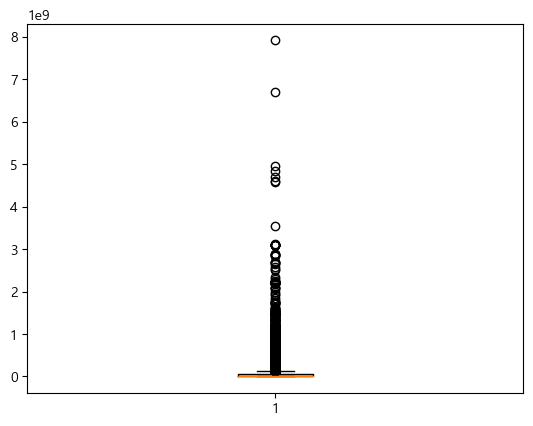

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

plt.boxplot(service_data['점포별_평균_매출_금액'])
plt.show()

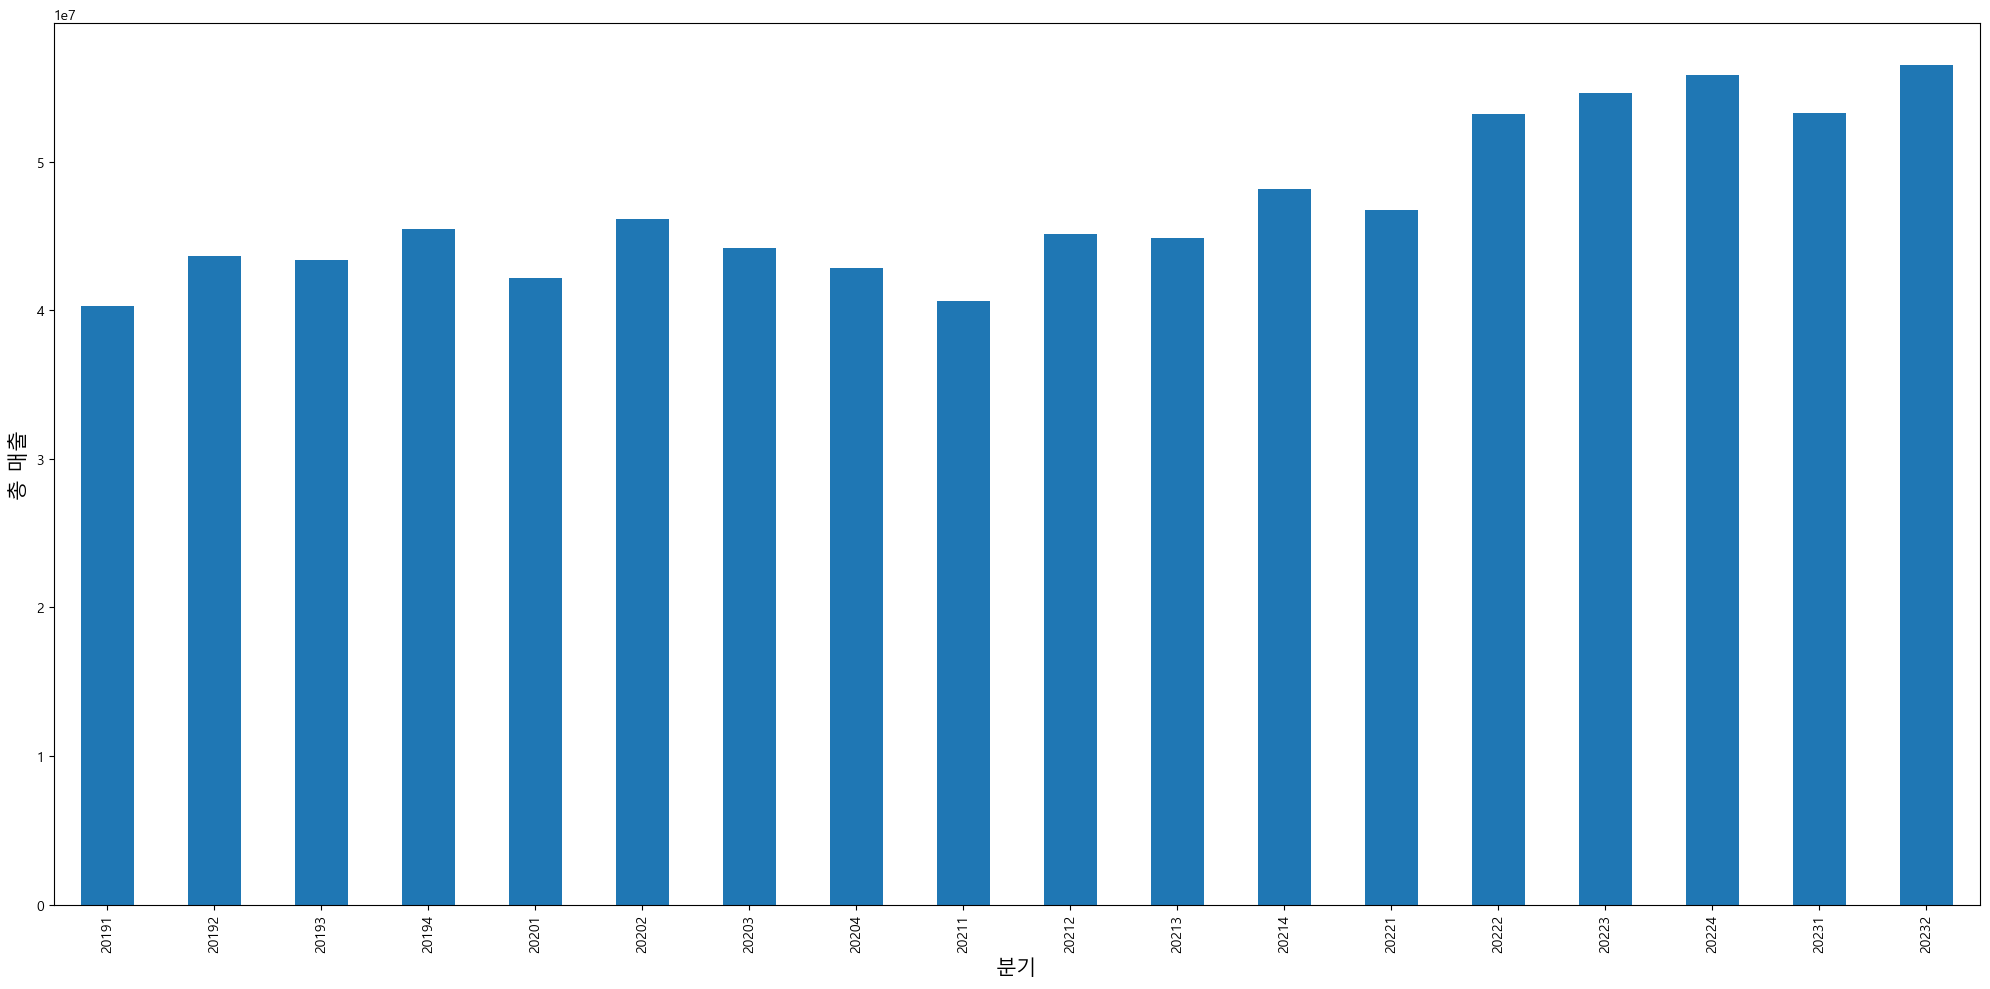

'_summary_\n1. 코로나(20.1-21.4)와 이후는 추세 차이 존재 -> 코로나 변수 생성\n2.  총 매출에서 반복되는 추세가 보임 → 분기(1,2,3,4) 생성\n'

In [151]:
## 분기별 추이 확인(전체)
quarter_sales = service_data.groupby(["기준_년분기_코드"])["점포별_평균_매출_금액"].mean()

# Matplotlib을 사용한 그룹별 바 플롯
plt.figure(figsize=(20,10))
quarter_sales.plot(kind='bar', legend=False)

plt.xlabel("분기", fontsize=15)
plt.ylabel('총 매출', fontsize=15)
#plt.title(var+' 총 매출-'+title , fontsize=20)

# 라벨이 겹치지 않도록 조정
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()
 
 
"""_summary_
1. 코로나(20.1-21.4)와 이후는 추세 차이 존재 -> 코로나 변수 생성
2.  총 매출에서 반복되는 추세가 보임 → 분기(1,2,3,4) 생성
"""

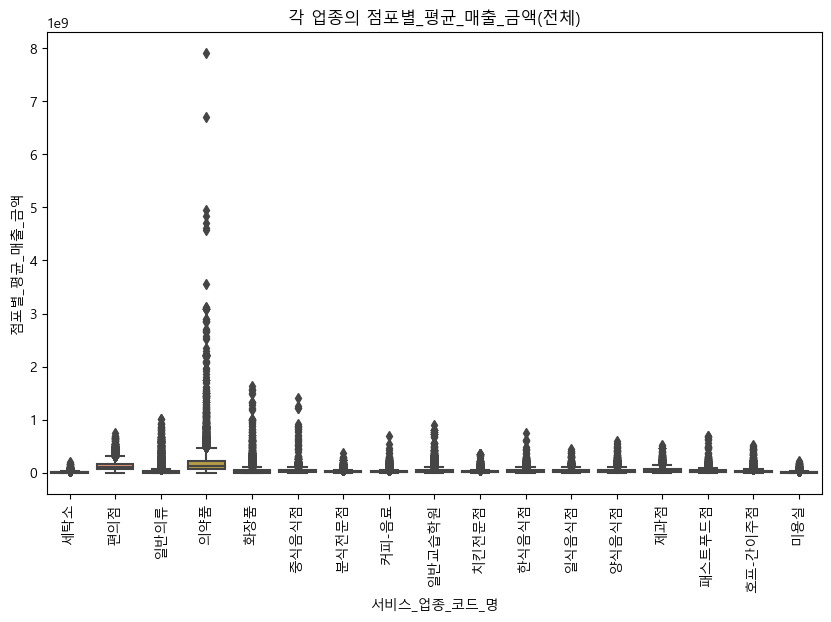

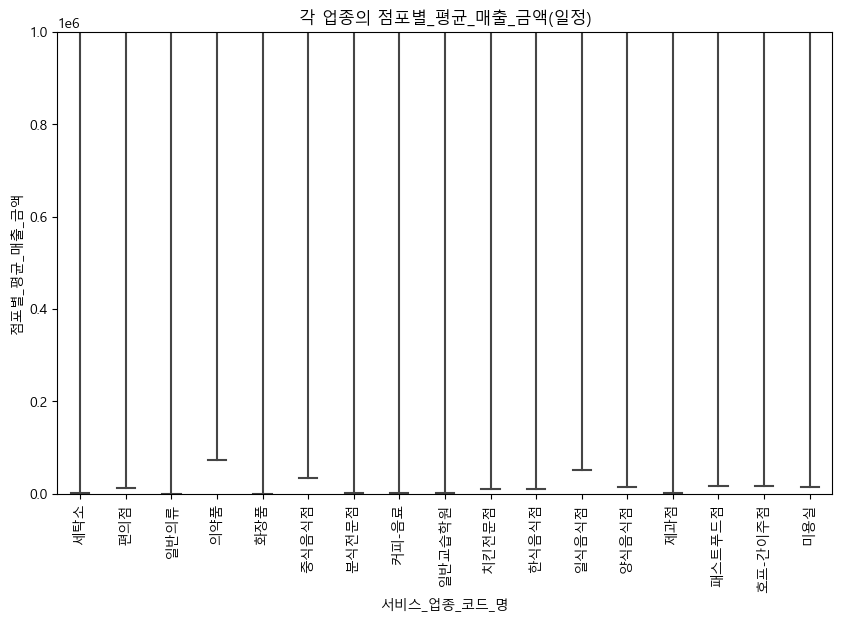

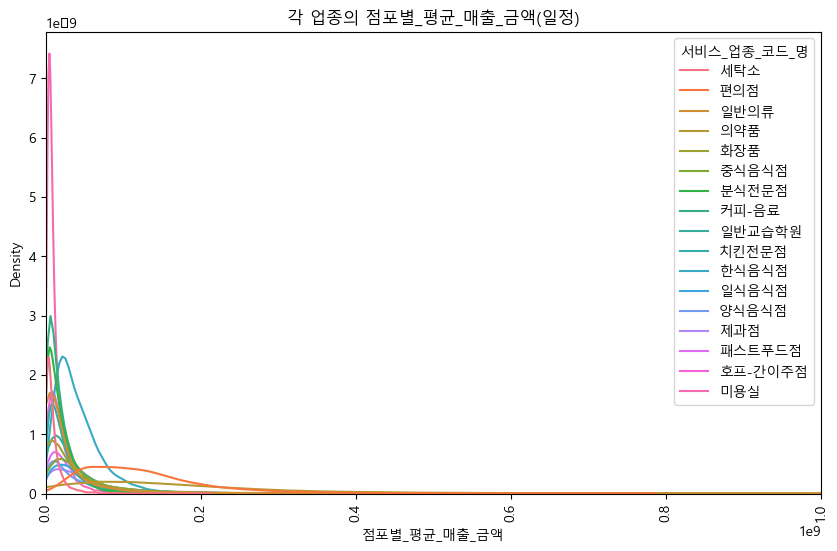

In [152]:
## 각 업종별 평균 매출 추이 파악 - 세탁소 에러 확인(제거), 100만원 이하 건수 삭제 시행
plt.figure(figsize=(10, 6))
plt.title('각 업종의 점포별_평균_매출_금액(전체)')
sns.boxplot(data=service_data, x='서비스_업종_코드_명', y='점포별_평균_매출_금액')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('각 업종의 점포별_평균_매출_금액(일정)')
sns.boxplot(data=service_data, x='서비스_업종_코드_명', y='점포별_평균_매출_금액')
plt.ylim(0, 1000000)
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('각 업종의 점포별_평균_매출_금액(일정)')
sns.kdeplot(data=service_data, x='점포별_평균_매출_금액', hue="서비스_업종_코드_명")
plt.xlim(0, 1000000000)
plt.xticks(rotation=90)
plt.show()

#### 세탁소 제거, 백만원 이하 제거

In [153]:
print('제거 전:',service_data.shape)
## [이슈4] 점포별_평균_매출_금액에 누락 값(이상치) 존재. 기준점을 세워 데이터 handling 진행
## [이슈5] 세탁소 제거 (현금 장사)
service_data_dropped = service_data[(service_data["점포별_평균_매출_금액"] > 1000000)&(service_data["서비스_업종_코드_명"]!="세탁소")]
print('제거 후:',service_data_dropped.shape)

제거 전: (181240, 184)
제거 후: (169232, 184)


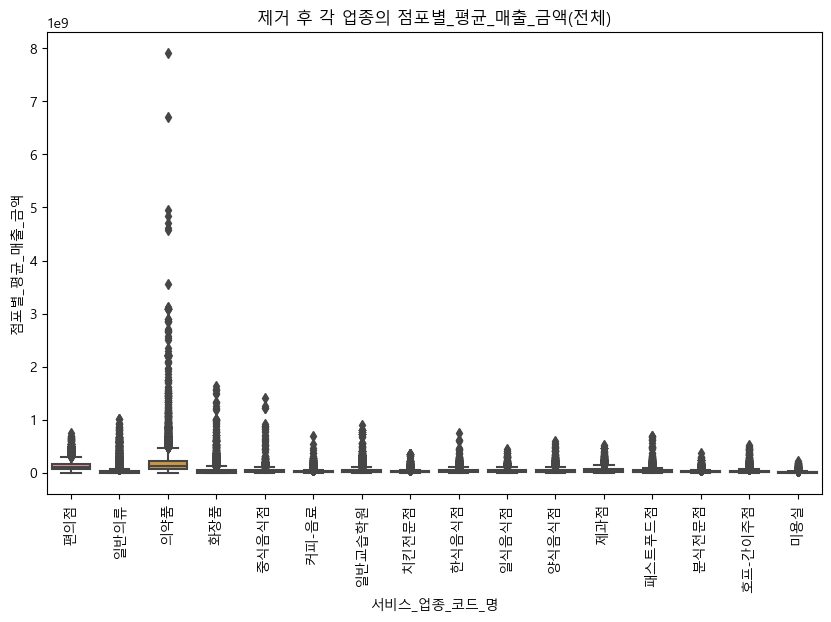

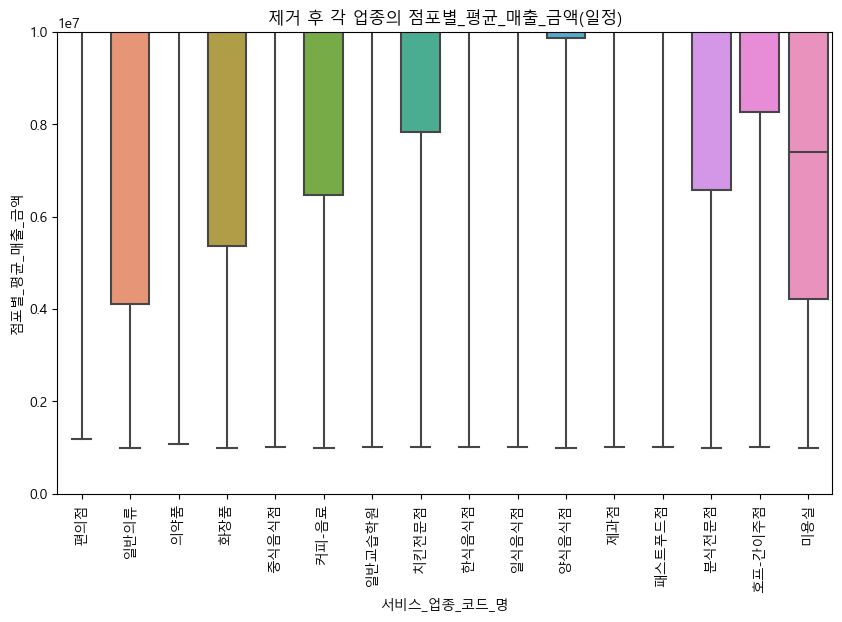

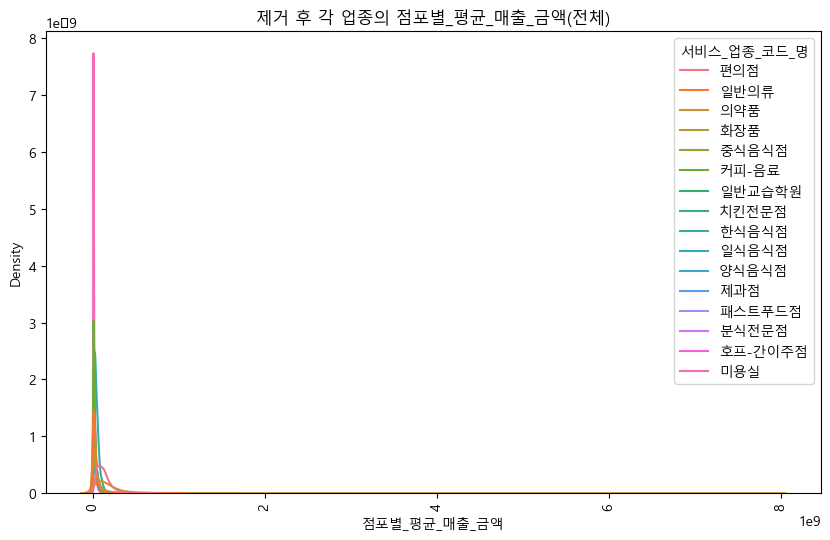

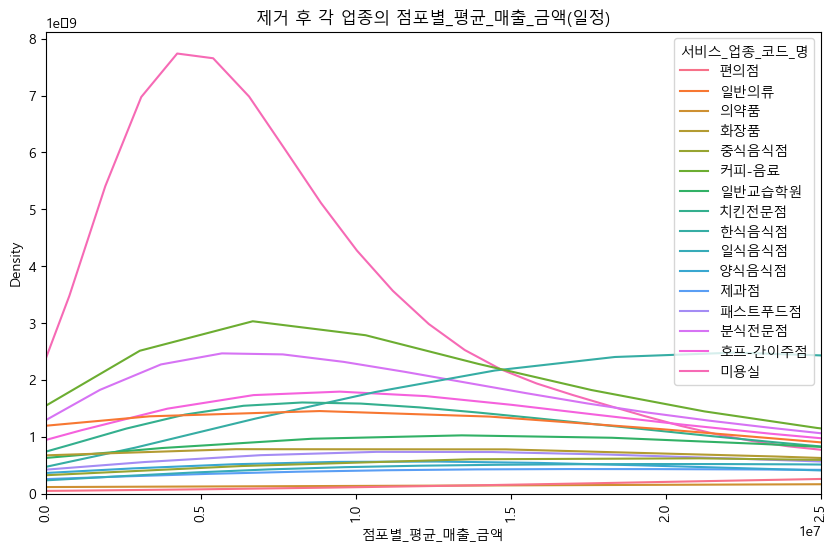

In [154]:
## 이상치 제거 후 각 업종별 평균 매출 추이 파악
plt.figure(figsize=(10, 6))
plt.title('제거 후 각 업종의 점포별_평균_매출_금액(전체)')
sns.boxplot(data=service_data_dropped, x='서비스_업종_코드_명', y='점포별_평균_매출_금액')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('제거 후 각 업종의 점포별_평균_매출_금액(일정)')
sns.boxplot(data=service_data_dropped, x='서비스_업종_코드_명', y='점포별_평균_매출_금액')
plt.ylim(0, 10000000)
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('제거 후 각 업종의 점포별_평균_매출_금액(전체)')
sns.kdeplot(data=service_data_dropped, x='점포별_평균_매출_금액', hue="서비스_업종_코드_명")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
plt.title('제거 후 각 업종의 점포별_평균_매출_금액(일정)')
sns.kdeplot(data=service_data_dropped, x='점포별_평균_매출_금액', hue="서비스_업종_코드_명")
plt.xlim(0, 25000000)
plt.xticks(rotation=90)
plt.show()

### 분기, 코로나 컬럼 추가

In [155]:
## 분기, 코로나 COL 추가
# 코로나 = 20201-20214
service_data_dropped["분기"] = service_data_dropped["기준_년분기_코드"].apply(lambda x: int(str(x)[-1]))
service_data_dropped["코로나_여부"] = service_data_dropped["기준_년분기_코드"].apply(lambda x: 1 if x<20221 else 0)
print(service_data_dropped.shape)
service_data_dropped[["기준_년분기_코드", "분기", "코로나_여부"]].sort_values("기준_년분기_코드")

(169232, 186)


,기준_년분기_코드,분기,코로나_여부
134,20191,1,1
11820,20191,1,1
11819,20191,1,1
11818,20191,1,1
11817,20191,1,1
...,...,...,...
323061,20232,2,0
323062,20232,2,0
323063,20232,2,0
323054,20232,2,0


## 발달상권만 추출

In [156]:
service_data_dropped_business = service_data_dropped[service_data_dropped['상권_구분_코드_명'] == '발달상권']
service_data_dropped_business = service_data_dropped_business.reset_index(drop=True)
service_data_dropped_business.shape

(49595, 186)

In [157]:
service_data_dropped_business.isnull().sum()

기준_년분기_코드          0
상권_구분_코드           0
상권_구분_코드_명         0
상권_코드              0
상권_코드_명            0
                ... 
아파트_가구_수        8055
비_아파트_가구_수      8055
점포별_평균_매출_금액       0
분기                 0
코로나_여부             0
Length: 186, dtype: int64

In [158]:
# 2019년 제외하면 결측치 없는 것 확인
temp = service_data_dropped_business[service_data_dropped_business['기준_년분기_코드'] >= 20201].isnull().sum()
temp[temp>0]

Series([], dtype: int64)

In [159]:
# 서비스 가능한 상권 214개
len(set(service_data_dropped_business[service_data_dropped_business['기준_년분기_코드'] >= 20201]['상권_코드']))

214

### csv 파일로 저장

In [160]:
service_data_dropped_business.to_csv('../../data/preprocessed data/market_service_data.csv', index=False)

## 모델 학습용 데이터

In [161]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)

### 1. 해당 분기 매출 예측
- y: `점포별_평균_매출_금액`
- `전년도_점포별_평균_매출_금액` 으로 추정

In [162]:
estimate = pd.read_csv('../../data/preprocessed data/market_service_data.csv')
estimate.shape

(49595, 186)

#### 불필요한 매출 관련 컬럼 제거

In [163]:
drop_cols = ['당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액',
       '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액',
       '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액',
       '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액',
       '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액',
       '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액',
       '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수',
       '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수',
       '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

print(len(drop_cols))

estimate = estimate.drop(columns=drop_cols)
print(estimate.shape)

48
(49595, 138)


#### 전년도_점포별_평균_매출_금액 컬럼 생성

In [164]:
before = estimate[['기준_년분기_코드', '상권_코드', '서비스_업종_코드', '점포별_평균_매출_금액']]
before['기준_년분기_코드'] += 10
before = before.rename(columns={'점포별_평균_매출_금액': '전년도_점포별_평균_매출_금액'})

print(before['기준_년분기_코드'].unique())
display(before)

[20201 20202 20203 20204 20211 20212 20213 20214 20221 20222 20223 20224
 20231 20232 20233 20234 20241 20242]


,기준_년분기_코드,상권_코드,서비스_업종_코드,전년도_점포별_평균_매출_금액
0,20201,3120024,CS300002,6.663190e+07
1,20201,3120036,CS300002,3.550997e+07
2,20201,3120064,CS300002,1.388520e+08
3,20201,3120065,CS300002,8.696063e+07
4,20201,3120070,CS300002,2.055043e+08
...,...,...,...,...
49590,20242,3120249,CS200028,3.781129e+07
49591,20242,3120249,CS300002,7.933989e+07
49592,20242,3120249,CS300011,3.069454e+07
49593,20242,3120249,CS300018,1.389368e+08


In [165]:
# '전년도_점포별_평균_매출_금액' 11853개 NaN
estimate = estimate.merge(before, how='left', on=['기준_년분기_코드', '상권_코드', '서비스_업종_코드'])
estimate.isnull().sum()

기준_년분기_코드               0
상권_구분_코드                0
상권_구분_코드_명              0
상권_코드                   0
상권_코드_명                 0
                    ...  
비_아파트_가구_수           8055
점포별_평균_매출_금액            0
분기                      0
코로나_여부                  0
전년도_점포별_평균_매출_금액    11795
Length: 139, dtype: int64

In [166]:
estimate.columns

Index(['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드',
       '서비스_업종_코드_명', '집객시설_수', '관공서_수', '은행_수',
       ...
       '여성연령대_40_상주인구_수', '여성연령대_50_상주인구_수', '여성연령대_60_이상_상주인구_수', '총_가구_수',
       '아파트_가구_수', '비_아파트_가구_수', '점포별_평균_매출_금액', '분기', '코로나_여부',
       '전년도_점포별_평균_매출_금액'],
      dtype='object', length=139)

### 2. 다음 분기 매출 예측
- y: `점포별_예상_평균_매출_금액`

현재시점이 2023년 2분기일 때, 
- `점포별_예상_평균_매출_금액`(2023년 3분기) → 다음 분기 매출 금액
- `전년도_점포별_평균_매출_금액`(2022년 3분기) → 예측할 분기의 전년도 매출 금액 

In [167]:
predict = pd.read_csv('../../data/preprocessed data/market_service_data.csv')
predict.shape

(49595, 186)

#### 불필요한 매출 관련 컬럼 제거

In [168]:
drop_cols = ['당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액',
       '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액',
       '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액',
       '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액',
       '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액',
       '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액',
       '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수',
       '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수',
       '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

print(len(drop_cols))

predict = predict.drop(columns=drop_cols)
print(predict.shape)

48
(49595, 138)


#### 점포별_예상_평균_매출_금액 컬럼 생성

In [169]:
before = predict[['기준_년분기_코드', '상권_코드', '서비스_업종_코드', '점포별_평균_매출_금액']]
before['기준_년분기_코드'] -= 1
before.loc[before['기준_년분기_코드'].isin([20190, 20200, 20210, 20220, 20230]), '기준_년분기_코드'] -= 6   # 0분기 → 전년도 4분기로 바꿔줌
before = before.rename(columns={'점포별_평균_매출_금액': '점포별_예상_평균_매출_금액'})

print(before['기준_년분기_코드'].unique())
display(before)

[20184 20191 20192 20193 20194 20201 20202 20203 20204 20211 20212 20213
 20214 20221 20222 20223 20224 20231]


,기준_년분기_코드,상권_코드,서비스_업종_코드,점포별_예상_평균_매출_금액
0,20184,3120024,CS300002,6.663190e+07
1,20184,3120036,CS300002,3.550997e+07
2,20184,3120064,CS300002,1.388520e+08
3,20184,3120065,CS300002,8.696063e+07
4,20184,3120070,CS300002,2.055043e+08
...,...,...,...,...
49590,20231,3120249,CS200028,3.781129e+07
49591,20231,3120249,CS300002,7.933989e+07
49592,20231,3120249,CS300011,3.069454e+07
49593,20231,3120249,CS300018,1.389368e+08


In [170]:
# '점포별_예상_평균_매출_금액' 3202개 NaN
predict = predict.merge(before, how='left', on=['기준_년분기_코드', '상권_코드', '서비스_업종_코드'])
predict.isnull().sum()

기준_년분기_코드             0
상권_구분_코드              0
상권_구분_코드_명            0
상권_코드                 0
상권_코드_명               0
                   ... 
비_아파트_가구_수         8055
점포별_평균_매출_금액          0
분기                    0
코로나_여부                0
점포별_예상_평균_매출_금액    3179
Length: 139, dtype: int64

#### 전년도_점포별_평균_매출_금액 컬럼 생성

In [171]:
before = estimate[['기준_년분기_코드', '상권_코드', '서비스_업종_코드', '점포별_평균_매출_금액']]
before['기준_년분기_코드'] += 10
before['기준_년분기_코드'] -= 1
before.loc[before['기준_년분기_코드'].isin([20190, 20200, 20210, 20220, 20230]), '기준_년분기_코드'] -= 6   # 0분기 → 전년도 4분기로 바꿔줌
before = before.rename(columns={'점포별_평균_매출_금액': '전년도_점포별_평균_매출_금액'})

print(before['기준_년분기_코드'].unique())
display(before)

[20194 20201 20202 20203 20204 20211 20212 20213 20214 20221 20222 20223
 20224 20231 20232 20233 20240 20241]


,기준_년분기_코드,상권_코드,서비스_업종_코드,전년도_점포별_평균_매출_금액
0,20194,3120024,CS300002,6.663190e+07
1,20194,3120036,CS300002,3.550997e+07
2,20194,3120064,CS300002,1.388520e+08
3,20194,3120065,CS300002,8.696063e+07
4,20194,3120070,CS300002,2.055043e+08
...,...,...,...,...
49590,20241,3120249,CS200028,3.781129e+07
49591,20241,3120249,CS300002,7.933989e+07
49592,20241,3120249,CS300011,3.069454e+07
49593,20241,3120249,CS300018,1.389368e+08


In [172]:
# '전년도_점포별_평균_매출_금액' 8998개 NaN
predict = predict.merge(before, how='left', on=['기준_년분기_코드', '상권_코드', '서비스_업종_코드'])
predict.isnull().sum()

기준_년분기_코드              0
상권_구분_코드               0
상권_구분_코드_명             0
상권_코드                  0
상권_코드_명                0
                    ... 
점포별_평균_매출_금액           0
분기                     0
코로나_여부                 0
점포별_예상_평균_매출_금액     3179
전년도_점포별_평균_매출_금액    8955
Length: 140, dtype: int64

In [173]:
predict = predict.drop(columns=['점포별_평균_매출_금액'])
predict.columns

Index(['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드',
       '서비스_업종_코드_명', '집객시설_수', '관공서_수', '은행_수',
       ...
       '여성연령대_40_상주인구_수', '여성연령대_50_상주인구_수', '여성연령대_60_이상_상주인구_수', '총_가구_수',
       '아파트_가구_수', '비_아파트_가구_수', '분기', '코로나_여부', '점포별_예상_평균_매출_금액',
       '전년도_점포별_평균_매출_금액'],
      dtype='object', length=139)

### 데이터 컬럼 정리

In [174]:
## vif 변수 조합 후 최종 컬럼 결정
drop_col_market_fin = ["집객시설_수", "유사_업종_점포_수", '지출_총금액', "총_유동인구_수", "총_가구_수", "여성_유동인구_수", "남성_유동인구_수",
              "월요일_유동인구_수", "화요일_유동인구_수", "수요일_유동인구_수", "목요일_유동인구_수", "금요일_유동인구_수",
              "토요일_유동인구_수", "일요일_유동인구_수", '총_상주인구_수', '남성_상주인구_수', '여성_상주인구_수',
              '남성연령대_10_상주인구_수', '남성연령대_20_상주인구_수', '남성연령대_30_상주인구_수', '남성연령대_40_상주인구_수', 
              '남성연령대_50_상주인구_수', '남성연령대_60_이상_상주인구_수', '여성연령대_10_상주인구_수', '여성연령대_20_상주인구_수', 
              '여성연령대_30_상주인구_수', '여성연령대_40_상주인구_수', '여성연령대_50_상주인구_수', '여성연령대_60_이상_상주인구_수',
              '총_직장_인구_수', '여성_직장_인구_수', '남성_직장_인구_수', '남성연령대_10_직장_인구_수', '남성연령대_20_직장_인구_수',
              '남성연령대_30_직장_인구_수', '남성연령대_40_직장_인구_수', '남성연령대_50_직장_인구_수', '남성연령대_60_이상_직장_인구_수', 
              '여성연령대_10_직장_인구_수', '여성연령대_20_직장_인구_수', '여성연령대_30_직장_인구_수', '여성연령대_40_직장_인구_수', 
              '여성연령대_50_직장_인구_수', '여성연령대_60_이상_직장_인구_수', '엑스좌표_값', '와이좌표_값', '영역_면적', '소득_구간_코드']

estimate_dropped = estimate.drop(drop_col_market_fin, axis=1)
predict_dropped = predict.drop(drop_col_market_fin, axis=1)

# null 삭제 - 2019년
estimate_dropped.dropna(inplace=True)
predict_dropped.dropna(inplace=True)

#### csv 파일로 저장

In [175]:
estimate_dropped.to_csv('../../data/preprocessed data/market_service_data_estimate.csv', index=False)
predict_dropped.to_csv('../../data/preprocessed data/market_service_data_predict.csv', index=False)